# Experiment Sacenti-JOURNAL2021

## Initial Setup

In [3]:
# Importações comuns
import numpy as np
import os
import pandas as pd # pandas is a data manipulation library

In [4]:
# Para plotar figuras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR)

def save_fig(fig_id, tight_layout=True, fig_extension="eps", resolution=1200):
    path = os.path.join(IMAGES_PATH, "Fig_" + fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
# Ignorar warnings desnecessários (ver SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## KG Type (Bipartite vs. Tripartite)

In [7]:
# KTUP Data
df_ktup=pd.DataFrame({'xi': list(range(4)),
                 'sKGs_ig_sv_p': np.array([0.583669,0.580806,0.571898,0.581866]),
                 'sKGs_ig_sv_r': np.array([0.340693,0.342978,0.336027,0.339764]),
                 'sKGs_ig_sv_ndcg': np.array([0.89323,0.894666,0.891337,0.892341]),
                 'sKGs_ig_sv_map': np.array([0.8542,0.854145,0.855131,0.862223]),
                 'sKGs_ig_mv_p': np.array([0.583669,0.569989,0.578897,0.575716]),
                 'sKGs_ig_mv_r': np.array([0.340693,0.333403,0.342464,0.340194]),
                 'sKGs_ig_mv_ndcg': np.array([0.89323,0.878048,0.884608,0.894756]),
                 'sKGs_ig_mv_map': np.array([0.8542,0.835274,0.843055,0.853038]),

                 'sKGs_uig_sv_p': np.array([0.583669,0.570626,0.571368,0.572959]),
                 'sKGs_uig_sv_r': np.array([0.340693,0.333738,0.332602,0.334208]),
                 'sKGs_uig_sv_ndcg': np.array([0.89323,0.89078,0.877268,0.896302]),
                 'sKGs_uig_sv_map': np.array([0.8542,0.85285,0.838343,0.85839]),
                 'sKGs_uig_mv_p': np.array([0.583669,0.582715,0.589714,0.569565]),
                 'sKGs_uig_mv_r': np.array([0.340693,0.342613,0.352248,0.333958]),
                 'sKGs_uig_mv_ndcg': np.array([0.89323,0.897456,0.904336,0.885365]),
                 'sKGs_uig_mv_map': np.array([0.8542,0.869313,0.875539,0.849081])
                     })

In [39]:
def plot_results_rs(df, rs):
    ratios = ['100%','75%','50%','25%']
    xi = df['xi']

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10), sharex=False, sharey=False, 
                                                 squeeze=False, gridspec_kw={'hspace': 0.30, 'wspace': 0.25})
    fig.suptitle('Recommendation quality results')
    ax1.plot('xi', 'sKGs_ig_sv_p', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sKG_ig_sv")
    ax1.plot('xi', 'sKGs_ig_mv_p', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sKG_ig_mv")
    ax1.plot('xi', 'sKGs_uig_sv_p', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="sKG_uig_sv")
    ax1.plot('xi', 'sKGs_uig_mv_p', data=df, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="sKG_uig_mv")
    ax1.legend()
    ax1.set_title('p')
    ax1.set(xlabel='entity preservation ratio', ylabel='p@10', title=rs)
    ax1.set_xticks(xi, minor=False)
    ax1.set_xticklabels(ratios, fontdict=None, minor=False)
    
    ax2.plot('xi', 'sKGs_ig_sv_r', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sKG_ig_sv")
    ax2.plot('xi', 'sKGs_ig_mv_r', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sKG_ig_mv")
    ax2.plot('xi', 'sKGs_uig_sv_r', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="sKG_uig_sv")
    ax2.plot('xi', 'sKGs_uig_mv_r', data=df, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="sKG_uig_mv")
    #ax2.legend()
    ax2.set_title('r')
    ax2.set(xlabel='entity preservation ratio', ylabel='r@10', title=rs)
    ax2.set_xticks(xi, minor=False)
    ax2.set_xticklabels(ratios, fontdict=None, minor=False)
    
    ax3.plot('xi', 'sKGs_ig_sv_ndcg', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sKG_ig_sv")
    ax3.plot('xi', 'sKGs_ig_mv_ndcg', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sKG_ig_mv")
    ax3.plot('xi', 'sKGs_uig_sv_ndcg', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="sKG_uig_sv")
    ax3.plot('xi', 'sKGs_uig_mv_ndcg', data=df, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="sKG_uig_mv")
    #ax3.legend()
    ax3.set_title('nDCG')
    ax3.set(xlabel='entity preservation ratio', ylabel='nDCG', title=rs)
    ax3.set_xticks(xi, minor=False)
    ax3.set_xticklabels(ratios, fontdict=None, minor=False)
    
    ax4.plot('xi', 'sKGs_ig_sv_map', data=df, marker='', markersize=8, linestyle='dashed', color='blue', linewidth=2, label="sKG_ig_sv")
    ax4.plot('xi', 'sKGs_ig_mv_map', data=df, marker='', markersize=8, linestyle='solid', color='red', linewidth=2, label="sKG_ig_mv")
    ax4.plot('xi', 'sKGs_uig_sv_map', data=df, marker='', markersize=8, linestyle='dotted', color='olive', linewidth=2, label="sKG_uig_sv")
    ax4.plot('xi', 'sKGs_uig_mv_map', data=df, marker='', markersize=8, linestyle='dashdot', color='black', linewidth=2, label="sKG_uig_mv")
    #ax4.legend()
    ax4.set_title('mAP')
    ax4.set(xlabel='entity preservation ratio', ylabel='mAP', title=rs)
    ax4.set_xticks(xi, minor=False)
    ax4.set_xticklabels(ratios, fontdict=None, minor=False)
    
    #for ax in fig.get_axes():
    #    ax.label_outer()
        
    #plt.savefig(f'./Fig7_{rs}.eps', format='eps', dpi=1200)

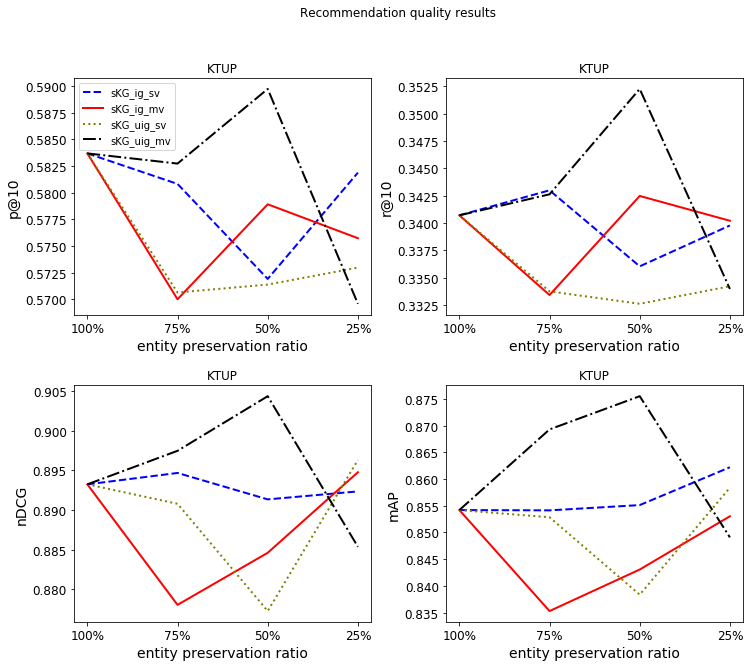

In [40]:
plot_results_rs(df_ktup, 'KTUP')